In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
import neattext.functions as nfx

In [8]:
df = pd.read_csv("IPD_Dataset.csv")

In [9]:
df.head()

,text,label
0,I love him,neutral
1,I got accepted into a Graduate program I wante...,neutral
2,our film production professor gave us our midt...,neutral
3,Just got done speaking with the inspector for ...,neutral
4,so i'm nonbinary and despite knowing that most...,neutral


In [10]:
df.dtypes

text     object
label    object
dtype: object

In [11]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
df['label'].value_counts()

neutral       23394
depression    19937
stress         1488
anxiety         733
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

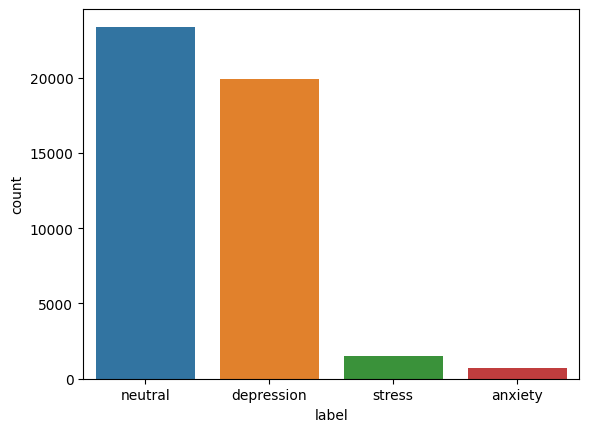

In [9]:
sns.countplot(x ='label', data = df)

### Exploration
+ Sentiment analysis
+ Keyword extraction

In [13]:
!pip install textblob


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Sentiment analysis
from textblob import TextBlob

In [15]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment >0:
        result = "Positive"
    elif sentiment <0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [16]:
get_sentiment("I love coding")

'Positive'

In [17]:
df['Sentiment'] = df['text'].apply(get_sentiment)

In [18]:
df.head()

,text,label,Sentiment
0,I love him,neutral,Positive
1,I got accepted into a Graduate program I wante...,neutral,Negative
2,our film production professor gave us our midt...,neutral,Positive
3,Just got done speaking with the inspector for ...,neutral,Positive
4,so i'm nonbinary and despite knowing that most...,neutral,Positive


In [19]:
# Comparing state vs sentiment
df.groupby(['label','Sentiment']).size()

label       Sentiment
anxiety     Negative       276
            Neutral        252
            Positive       205
depression  Negative     10849
            Neutral       2735
            Positive      6353
neutral     Negative      3618
            Neutral       5261
            Positive     14515
stress      Negative       771
            Neutral         33
            Positive       684
dtype: int64

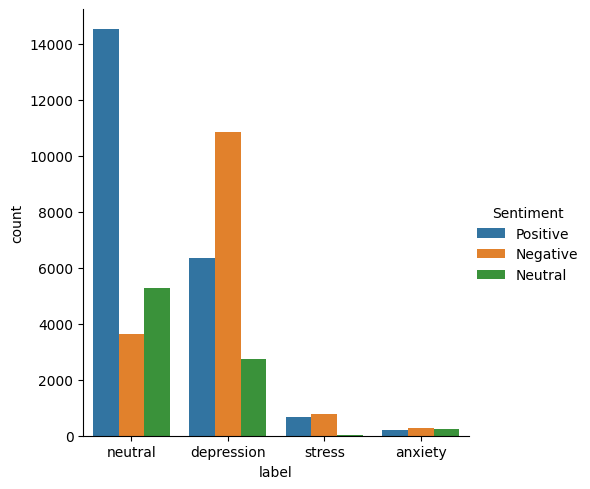

In [16]:
sns.catplot(x='label',hue='Sentiment',data=df,kind='count')

In [17]:
### Text Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
df['Clean_Text'] = df['text'].apply(nfx.remove_stopwords)

In [21]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [22]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [23]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_urls)

In [24]:
df[['text','Clean_Text']]

,text,Clean_Text
0,I love him,love
1,I got accepted into a Graduate program I wante...,got accepted Graduate program wanted journey t...
2,our film production professor gave us our midt...,film production professor gave midterms today ...
3,Just got done speaking with the inspector for ...,got speaking inspector 139yr old mansion weÃ¢â...
4,so i'm nonbinary and despite knowing that most...,im nonbinary despite knowing teachers pretty a...
...,...,...
45547,JYP RIPEO SI O NO?,JYP RIPEO SI NO
45548,DEAR MY LECTURERS,DEAR LECTURERS
45549,"when you're on vacation, you're really confuse...",vacation confused ðŸ˜©
45550,why i 0 twt sis? eh i've never tweeted,0 twt sis eh ive tweeted


### Keyword Extraction

In [25]:
from collections import Counter

In [26]:
def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [27]:
mental_states = df["label"].unique().tolist()

In [28]:
mental_states

['neutral', 'depression', 'stress', 'anxiety']

In [29]:
depression_list = df[df['label'] == 'depression' ]['Clean_Text'].tolist()

In [30]:
#depression doc
depression_docx = ' '.join(depression_list)

In [31]:
depression_docx

'help Hi Iâ€™m sorryâ€¦ donâ€™t know feel empty let grasp intent time donâ€™t know donâ€™t feel Pretending Im depressed tell people Im depressed lied mom applying college Dying bad motivation good people dying Everytime look feel heart drop hate face Im learning Canâ€™t understand brain Canâ€™t understand figure Iâ€™m constantly self sabotaging depressed watched Iâ€™m turning 17 Wednesday want fucking die feel like life stolen sleep anti depressant feel hopeless want end Im posting support want die Wish sleep Jacks complete lack meaning Point living miss relatable depression Stuck maybe iâ€™m fucking problem haha :) damn Depression waking naps know do want feel better 21m confused this cite username going reply ItS weed PusSY going pull strand hair head completely dependent weed $ vent im fucking idiot wouldnâ€™t hard think Iâ€™m depressed lol downloaded Replika think need real irl friend antidepressants sleepy want die Im scared commit it  donâ€™t know took long realize likely depress

In [32]:
#Extracting keywords
keyword_depression = extract_keywords(depression_docx)

In [33]:
keyword_depression

{'depression': 7353,
 'want': 6767,
 'feel': 6282,
 'like': 5787,
 'life': 4730,
 'cry': 4669,
 'depressed': 4638,
 'hate': 3403,
 'know': 3213,
 'stressed': 2946,
 'today': 2815,
 'people': 2760,
 'time': 2547,
 'absolutely': 2274,
 'anxiety': 2264,
 'severe': 2221,
 'damn': 2189,
 'suffer': 2183,
 'miserable': 2161,
 'day': 2110,
 'Im': 1936,
 'dont': 1921,
 'think': 1830,
 'work': 1756,
 'help': 1711,
 'going': 1666,
 'Iâ€™m': 1590,
 'hurt': 1588,
 'im': 1549,
 'need': 1546,
 'cant': 1518,
 'stress': 1518,
 'bad': 1494,
 'fucking': 1487,
 'things': 1409,
 'feeling': 1318,
 'got': 1314,
 'shit': 1283,
 'me': 1247,
 'years': 1234,
 'good': 1224,
 'amp': 1221,
 'hurts': 1123,
 'better': 1108,
 'right': 1104,
 'friends': 1103,
 'sad': 1091,
 'way': 1074,
 'makes': 1007,
 'donâ€™t': 1005}

In [34]:
#Plot
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

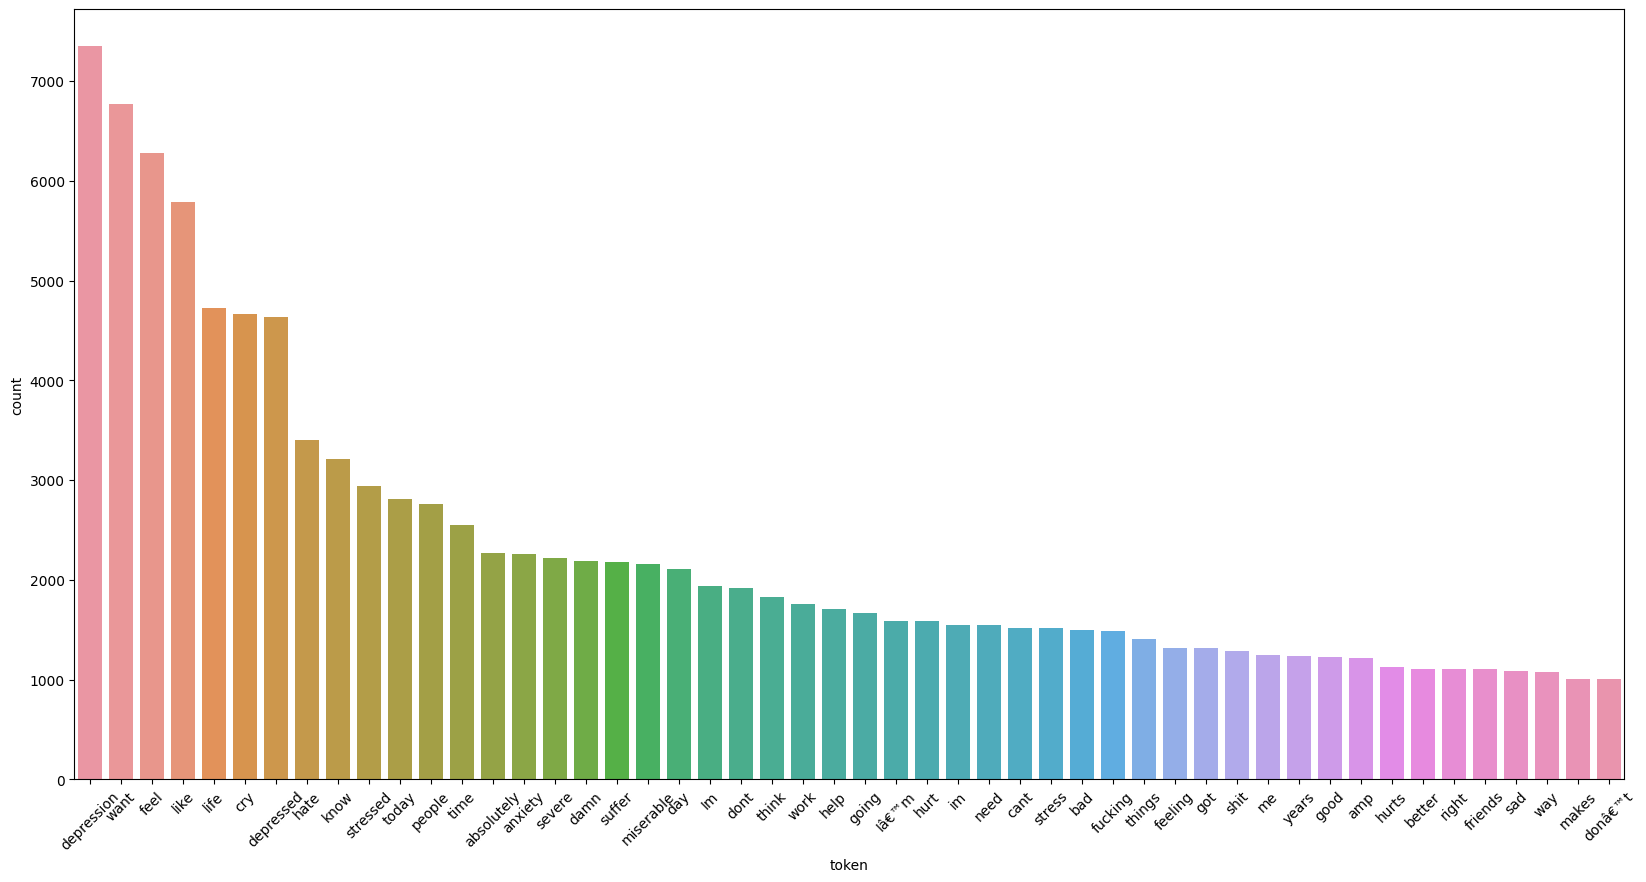

In [35]:
plot_most_common_words(keyword_depression)

In [36]:
neutral_list = df[df['label'] == 'neutral' ]['Clean_Text'].tolist()
neutral_docx = ' '.join(neutral_list)
keyword_neutral = extract_keywords(neutral_docx)

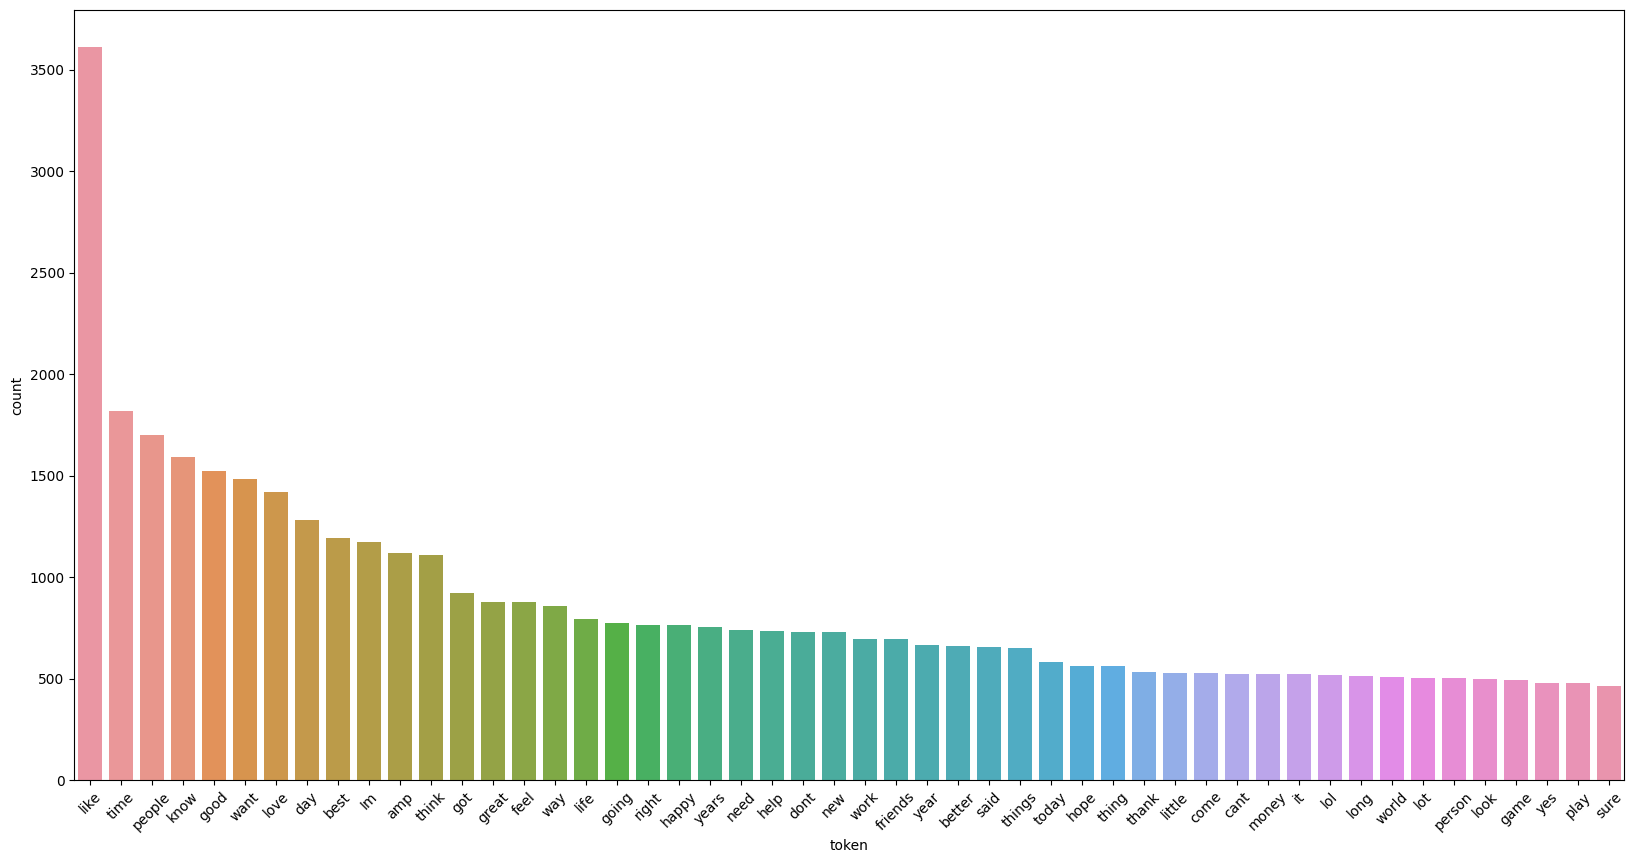

In [37]:
plot_most_common_words(keyword_neutral)

In [38]:
stress_list = df[df['label'] == 'stress' ]['Clean_Text'].tolist()
stress_docx = ' '.join(stress_list)
keyword_stress = extract_keywords(stress_docx)

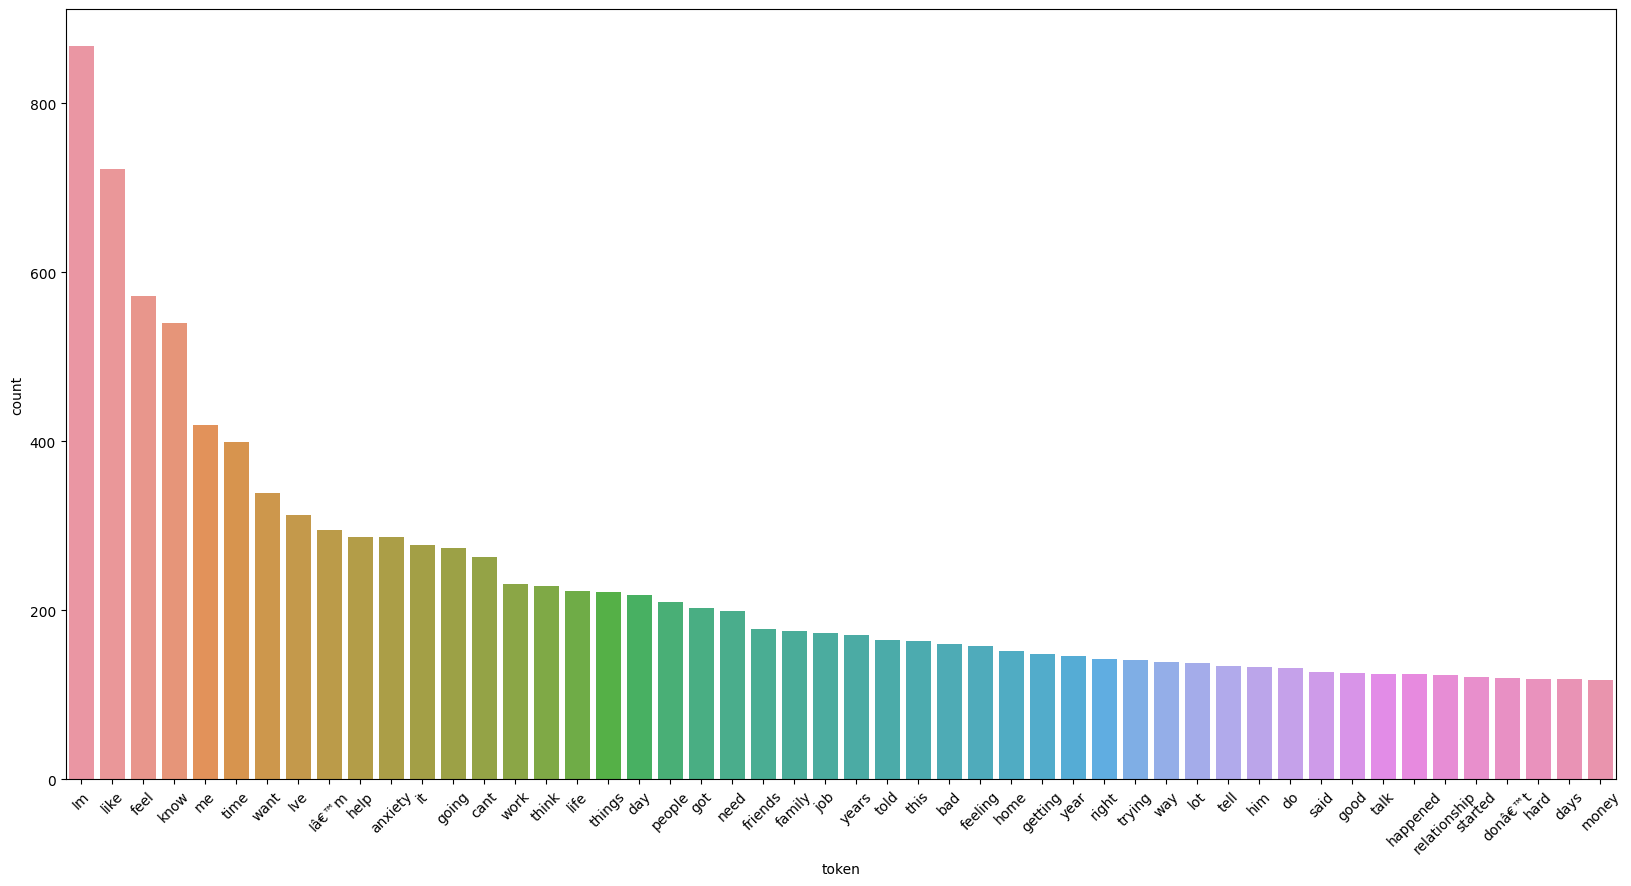

In [39]:
plot_most_common_words(keyword_stress)

In [40]:
anxiety_list = df[df['label'] == 'anxiety' ]['Clean_Text'].tolist()
anxiety_docx = ' '.join(anxiety_list)
keyword_anxiety = extract_keywords(anxiety_docx)

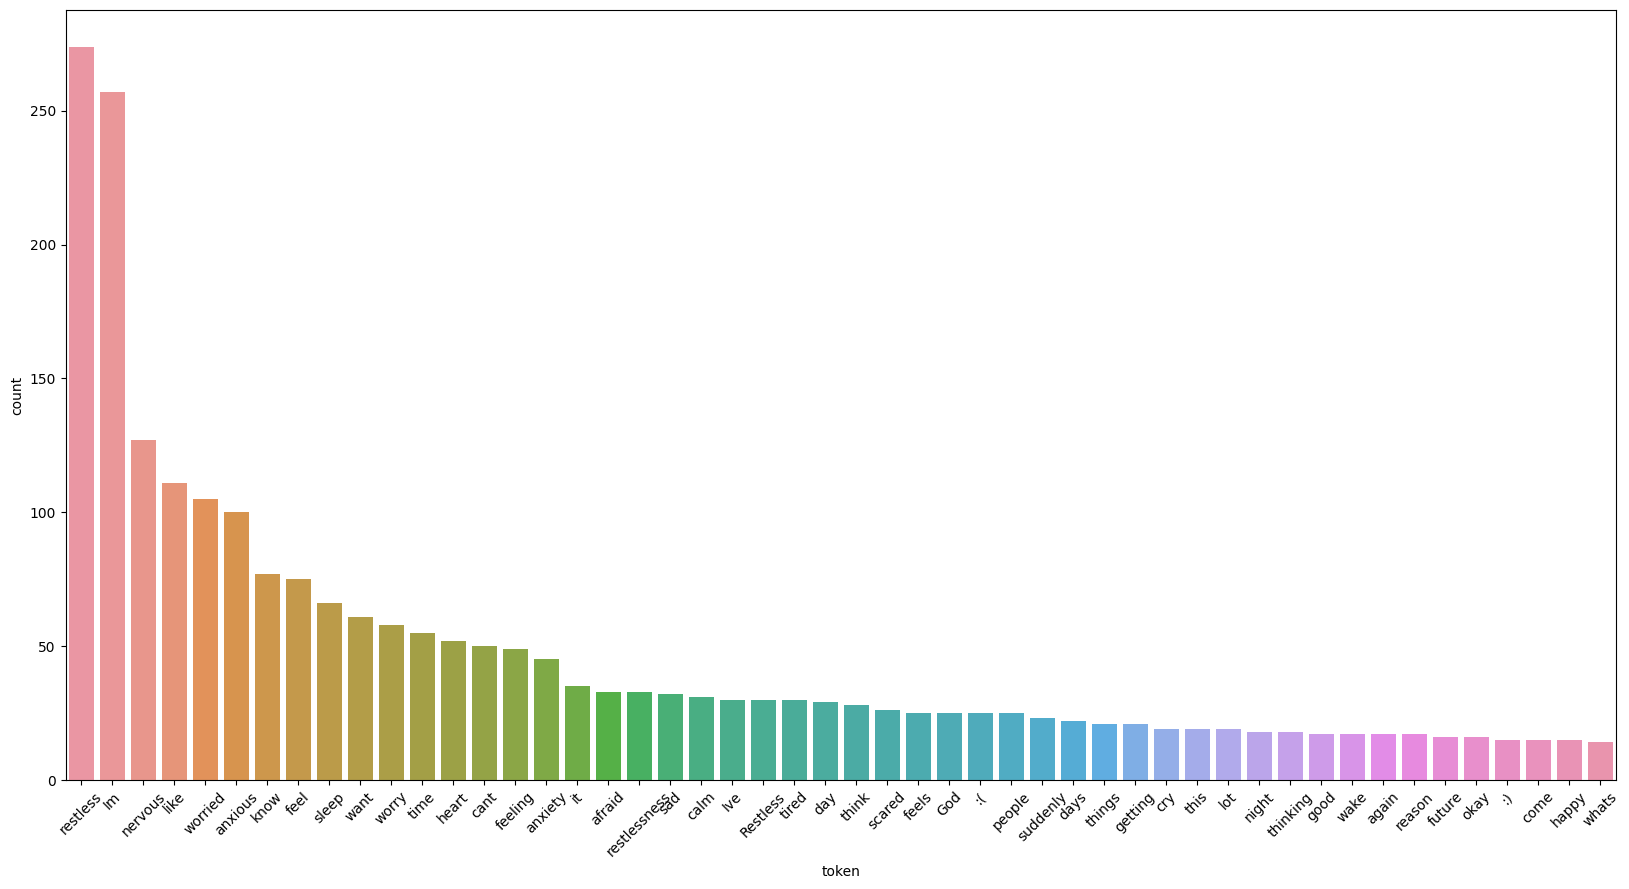

In [41]:
plot_most_common_words(keyword_anxiety)

### Machine Learning

In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\dayan marasinghe\appdata\local\programs\python\python311\lib\site-packages (1.2.1)




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
#Splitting dataset
from sklearn.model_selection import train_test_split

### Building features from text

In [46]:
Xfeatures = df['Clean_Text']
ylabels = df['label']

In [47]:
Xfeatures

0                                                     love
1        got accepted Graduate program wanted journey t...
2        film production professor gave midterms today ...
3        got speaking inspector 139yr old mansion weÃ¢â...
4        im nonbinary despite knowing teachers pretty a...
                               ...                        
45547                                      JYP RIPEO SI NO
45548                                       DEAR LECTURERS
45549                               vacation confused ðŸ˜©
45550                             0 twt sis eh ive tweeted
45551                           cant forget #SpiritHadrian
Name: Clean_Text, Length: 45552, dtype: object

In [48]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [49]:
# Get features by name
cv.get_feature_names_out()

array(['00', '000', '0000', ..., 'ˆì', 'ˆíš', 'ˆðÿ'], dtype=object)

In [51]:
# To dense array (Numpy)
X.toarray()

MemoryError: Unable to allocate 16.5 GiB for an array with shape (45552, 48758) and data type int64

In [52]:
# Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

# Build the model

In [53]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\Dayan Marasinghe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
#accuracy for lr model
lr_model.score(X_test,y_test)

0.9213376262256695

In [55]:
# Predictions
y_pred_for_lr = lr_model.predict(X_test)

In [56]:
y_pred_for_lr

array(['neutral', 'neutral', 'depression', ..., 'neutral', 'neutral',
       'stress'], dtype=object)

In [57]:
# sample text
sample_text = ["I love coding so much"]

In [58]:
vect = cv.transform(sample_text).toarray()

In [59]:
#Making the prediction
lr_model.predict(vect)

array(['neutral'], dtype=object)

In [60]:
#prediction probability (percentage)/confidence score
lr_model.predict_proba(vect)

array([[0.00335563, 0.09768626, 0.89673371, 0.0022244 ]])

In [61]:
def predict_mental_state(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [62]:
predict_mental_state(sample_text,lr_model)

Prediction:neutral, Prediction Score:0.8967337086232464


{'anxiety': 0.0033556291186769196,
 'depression': 0.09768625764281513,
 'neutral': 0.8967337086232464,
 'stress': 0.0022244046152616287}

# Model evaluation

In [59]:
#Classification
print(classification_report(y_test,y_pred_for_lr))

              precision    recall  f1-score   support

     anxiety       0.85      0.85      0.85       219
  depression       0.95      0.91      0.93      5998
     neutral       0.92      0.96      0.94      7009
      stress       0.53      0.38      0.45       440

    accuracy                           0.92     13666
   macro avg       0.81      0.78      0.79     13666
weighted avg       0.92      0.92      0.92     13666



In [60]:
#Confusion
confusion_matrix(y_test,y_pred_for_lr)

array([[ 187,    8,   24,    0],
       [   4, 5473,  439,   82],
       [  18,  164, 6762,   65],
       [  10,  112,  149,  169]], dtype=int64)

## Save model

In [2]:
import joblib

In [63]:
model_file = open("mentalhealth_classifier_lr_model.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()

## Model interpretation

In [120]:
import eli5

In [119]:
pip install eli5

     ------------------------------------ 216.2/216.2 kB 454.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
  Running setup.py install for eli5: started
  Running setup.py install for eli5: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: eli5 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [121]:
# show the weights for each class
eli5.show_weights(lr_model, top=20)

In [122]:
class_names = ylabels.unique().tolist()

In [124]:
feature_names = cv.get_feature_names_out()

In [125]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)

In [63]:
    loaded_model = joblib.load("mentalhealth_classifier_lr_model.pkl")
    result = loaded_model.score(X_test, y_test)
    print(result)

0.9213376262256695


In [65]:
sample_text2=["I hate this"]

In [71]:
predict_mental_state(sample_text2,lr_model)

Prediction:depression, Prediction Score:0.9201085756996835


{'anxiety': 0.006950537389869374,
 'depression': 0.9201085756996835,
 'neutral': 0.059667081988555186,
 'stress': 0.013273804921891804}

In [1]:
plt.plot(result)
plt.ylabel('Score')
plt.xlabel('epoch')
plt.show()

NameError: name 'plt' is not defined